In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
def touchscreen(text):
    if 'Touchscreen' in text:
        return 1
    else:
        return 0

In [6]:
df['TouchScreen'] = df['ScreenResolution'].apply(touchscreen)

In [7]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

In [8]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [9]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
TouchScreen         0
dtype: int64

In [10]:
df.shape

(1303, 12)

In [11]:
df.duplicated().sum()

np.int64(29)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1274, 12)

In [14]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [15]:
#Cleaning RAM column
def RAM_Cleaning(text):
    return int(text.replace('GB',''))

In [16]:
df['Ram'] = df['Ram'].apply(RAM_Cleaning) 

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0


In [18]:
def remove_kg(text):
    return float(text.replace('kg',''))

In [19]:
df['Weight'] = df['Weight'].apply(remove_kg)

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [21]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [22]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
TouchScreen           int64
dtype: object

EXPLORATORY DATA ANALYSIS

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

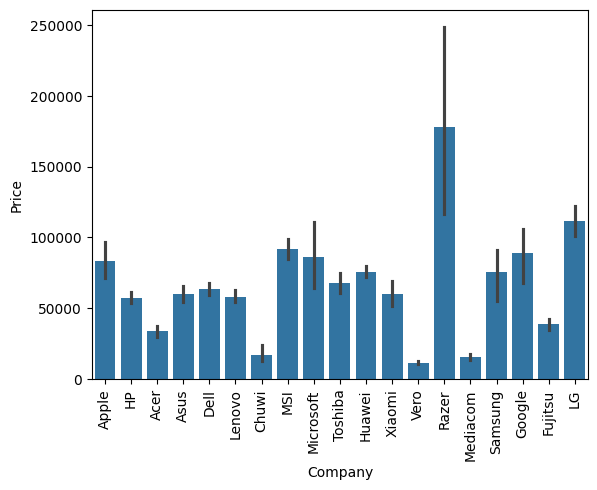

In [24]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

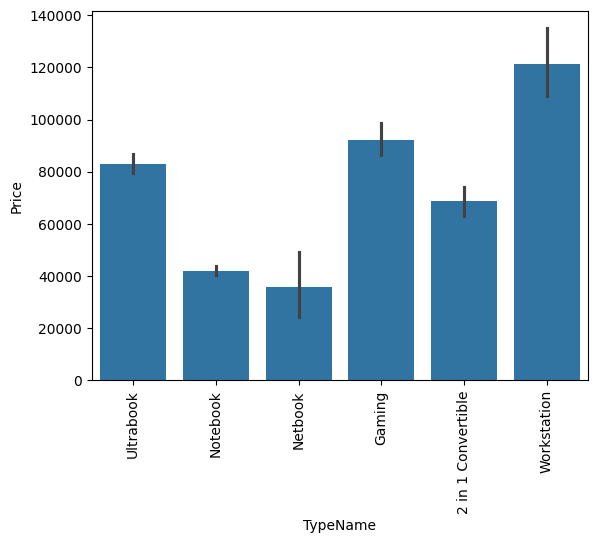

In [25]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

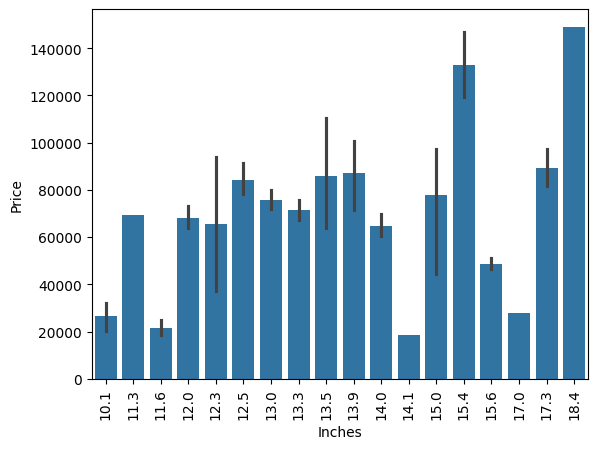

In [26]:
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


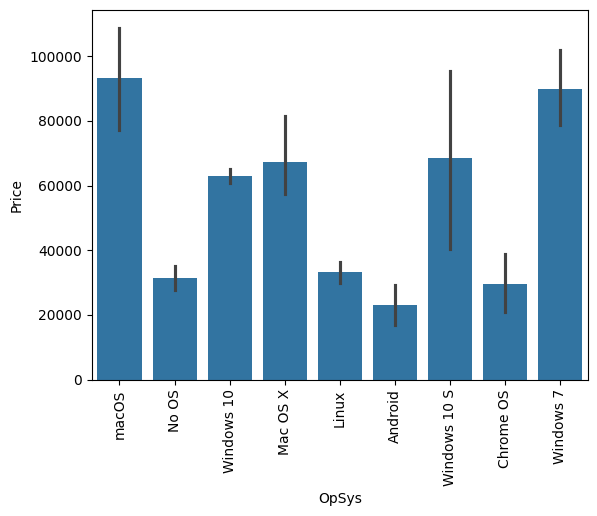

In [28]:
sns.barplot(x= df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
def cpu_freqn(text):
    freqn = text.split(' ')[-1]
    
    return float(freqn.replace('GHz',''))

In [30]:
df['cpu_freqn'] = df['Cpu'].apply(cpu_freqn)

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1


In [32]:
df['Screen_Resolution_Size'] = df['ScreenResolution'].apply(lambda x:x.split()[-1])

In [33]:
df['X_Screen'] = df['Screen_Resolution_Size'].apply(lambda x: int(x.split('x')[0]))
df['Y_Screen'] = df['Screen_Resolution_Size'].apply(lambda x: int(x.split('x')[1]))

In [34]:
df.drop(columns=['Screen_Resolution_Size'],axis=1,inplace=True)

In [35]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [36]:
df.drop(columns=['ScreenResolution'], axis=1,inplace=True)

In [37]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [38]:
df.head(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,X_Screen,Y_Screen,IPS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,2560,1600,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,1440,900,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,1920,1080,0


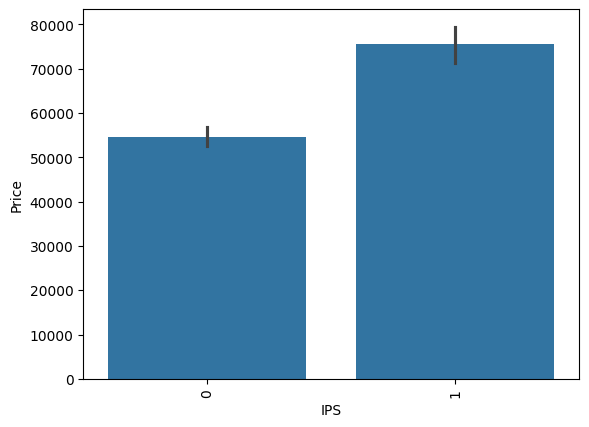

In [39]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
df['Price'].dtype

dtype('float64')

In [41]:
df['PPI'] = ((df['X_Screen']**2 + df['Y_Screen']**2)**0.5) / df['Inches']

In [42]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,X_Screen,Y_Screen,IPS,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,2560,1600,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,1440,900,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,1920,1080,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7,2880,1800,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,2560,1600,1,226.983005


In [43]:
new = df[['Inches','Ram','Weight','Price','cpu_freqn','X_Screen', 'Y_Screen','IPS','PPI']]

In [44]:
new.corr()['Price']

Inches       0.066990
Ram          0.740106
Weight       0.212192
Price        1.000000
cpu_freqn    0.428178
X_Screen     0.552074
Y_Screen     0.548111
IPS          0.250358
PPI          0.469539
Name: Price, dtype: float64

In [45]:
df.drop(columns=['Inches','X_Screen','Y_Screen'],axis=1,inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,1,226.983005


In [46]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split(' ')[0:3]))

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,1,226.983005,Intel Core i5


In [48]:
def Processor_Cleaning(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        return 'Other Intel Processor' if 'Intel' in text else 'AMD Processor'

In [49]:
df['Cpu Brand'] = df['Cpu Name'].apply(Processor_Cleaning)

In [50]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Name,Cpu Brand
280,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.80,45767.52,0,2.7,0,106.113062,Intel Core i7,Intel Core i7
658,Lenovo,Gaming,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960,Windows 10,3.31,63722.88,0,2.6,1,141.211998,Intel Core i7,Intel Core i7


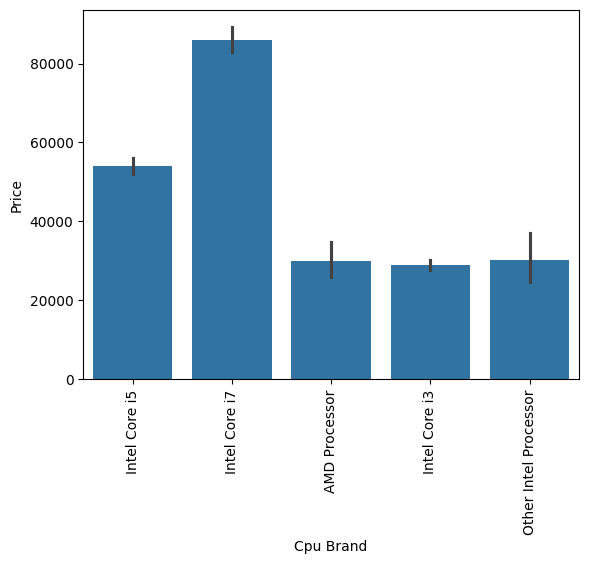

In [51]:
sns.barplot(x=df['Cpu Brand'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [52]:
df.drop(columns=['Cpu Name','Cpu'],axis=1,inplace=True)
df.sample(6)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand
248,HP,Notebook,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49,35964.00,0,1.6,1,165.632118,Intel Core i5
1021,Toshiba,Ultrabook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,84715.20,0,2.3,0,165.632118,Intel Core i5
398,Dell,Workstation,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,144495.36,1,2.8,0,282.423996,Intel Core i7
1179,HP,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,34632.00,0,2.3,0,100.454670,Intel Core i3
824,Lenovo,Ultrabook,8,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13,99900.00,0,2.5,1,157.350512,Intel Core i5
894,MSI,Gaming,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,141138.72,0,2.6,1,254.671349,Intel Core i7


In [53]:
def memory_conversion(text):
    if 'SSD' in text and 'HDD' not in text:
        df['SSD'] = df['Memory'][0].replace('GB','')
        df['HDD'] = 0
        df['Hybrid'] = 0
        df['Flash Storage'] = 0
    
    elif 'HDD' in text and 'SDD' not in text:
        df['HDD'] = df['Memory'][0].replace('GB','')
        df['SSD'] = 0
        df['Hybrid'] = 0
        df['Flash Storage'] = 0
    
    elif 'HDD' in text and 'SSD' in text:
        df['Hybrid'] = df['Memory'][0].replace('GB','')
        df['SSD'] = 0
        df['HDD'] = 0
        df['Flash Storage'] = 0
    
    else:
        df['Flash Storage'] = df['Memory'][0].replace('GB','')
        df['SSD'] = 0
        df['Hybrid'] = 0
        df['HDD'] = 0

In [54]:
import pandas as pd
import re

# Function to extract memory size and type, handling both GB and TB
def memory_conversion(text):
    result = {
        'SSD': 0,
        'HDD': 0,
        'Hybrid': 0,
        'Flash Storage': 0
    }

    # Extract all occurrences of size and type (e.g., '128GB SSD', '1TB HDD')
    matches = re.findall(r'(\d+)\s*(GB|TB)\s*(SSD|HDD|Hybrid|Flash Storage)', text, flags=re.IGNORECASE)

    for size, unit, type_ in matches:
        size = int(size)
        if unit.upper() == 'TB':  # Convert TB to GB (1TB = 1024GB)
            size *= 1024

        if type_.lower() == 'ssd':
            result['SSD'] += size
        elif type_.lower() == 'hdd':
            result['HDD'] += size
        elif type_.lower() == 'hybrid':
            result['Hybrid'] += size
        elif type_.lower() == 'flash storage':
            result['Flash Storage'] += size

    return result

# Apply the function to the Memory column
memory_data = df['Memory'].apply(memory_conversion).apply(pd.Series)

# Add the extracted values back to the DataFrame
df[['SSD', 'HDD', 'Hybrid', 'Flash Storage']] = memory_data

# Fill the new columns with extracted memory sizes
df.fillna(0, inplace=True)

In [55]:
df.sample(6)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,HDD,Hybrid,Flash Storage
73,MSI,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,58341.60,0,2.5,0,127.335675,Intel Core i5,128,1024,0,0
27,Dell,Notebook,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42624.00,0,1.6,0,141.211998,Intel Core i5,256,0,0,0
1170,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.96,36177.12,0,2.5,0,141.211998,Intel Core i7,256,0,0,0
146,HP,Ultrabook,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,107305.92,1,1.2,1,352.465147,Other Intel Processor,512,0,0,0
187,Lenovo,Gaming,8,256GB SSD,Nvidia GeForce GTX 1050,No OS,2.40,41505.12,0,2.5,1,141.211998,Intel Core i5,256,0,0,0
712,Dell,Notebook,8,1TB HDD,Intel HD Graphics 620,Linux,1.98,38681.28,0,2.5,0,141.211998,Intel Core i5,0,1024,0,0


In [56]:
df.drop(columns=['Memory'],axis=1,inplace=True)

In [57]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,HDD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,1,226.983005,Intel Core i5,256,0,0,0


In [58]:
new = df[['Ram','Weight','cpu_freqn','IPS','PPI','SSD','HDD','Hybrid','Flash Storage','Price']]

In [59]:
new.corr()['Price']

Ram              0.740106
Weight           0.212192
cpu_freqn        0.428178
IPS              0.250358
PPI              0.469539
SSD              0.669807
HDD             -0.095512
Hybrid          -0.005345
Flash Storage   -0.037176
Price            1.000000
Name: Price, dtype: float64

In [60]:
df.drop(columns=['Hybrid','Flash Storage','HDD'], axis=1,inplace=True)

In [61]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7,1,220.534624,Intel Core i7,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,1,226.983005,Intel Core i5,256


In [62]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [63]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split(' ')[0])

In [64]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7,1,220.534624,Intel Core i7,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,1,226.983005,Intel Core i5,256,Intel


In [65]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [66]:
df = df[df['Gpu Brand']!='ARM']

In [67]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2.7,1,220.534624,Intel Core i7,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,3.1,1,226.983005,Intel Core i5,256,Intel


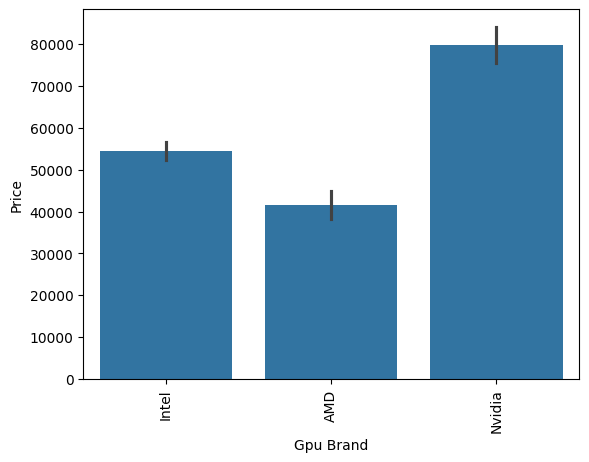

In [68]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

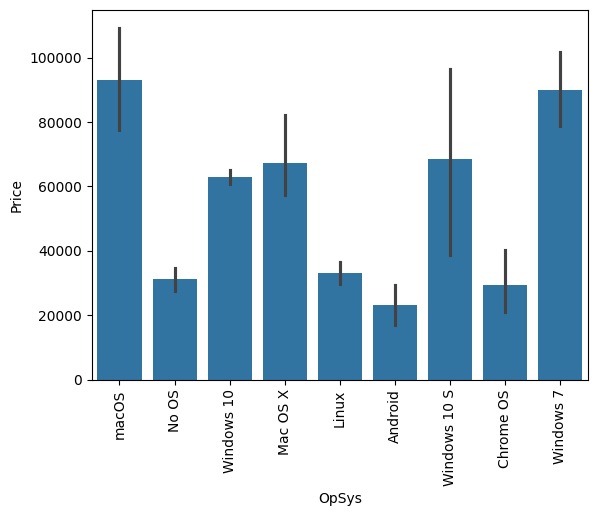

In [69]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [70]:
def Os_System(text):
    if 'Windows 10' in text or 'Windows 10 S' in text:
        return 'Windows'
    elif 'Linux' in text or 'Android' in text or 'Chrome OS' in text or 'No OS' in text:
        return 'Others'
    else:
        return 'macOS/Windows 7'

In [71]:
df['OS'] = df['OpSys'].apply(lambda x:Os_System(x))

In [72]:
df.drop(columns=['OpSys','Gpu'],inplace=True,axis=1)
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5,128,Intel,macOS/Windows 7
1,Apple,Ultrabook,8,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5,0,Intel,macOS/Windows 7
2,HP,Notebook,8,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,2.7,1,220.534624,Intel Core i7,512,AMD,macOS/Windows 7
4,Apple,Ultrabook,8,1.37,96095.8080,0,3.1,1,226.983005,Intel Core i5,256,Intel,macOS/Windows 7


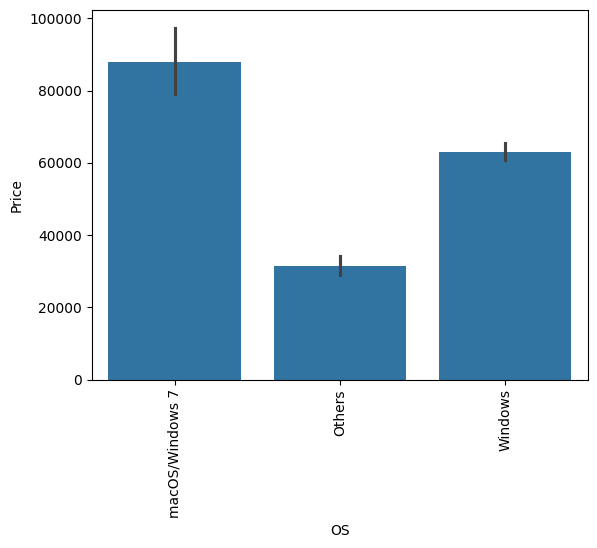

In [73]:
sns.barplot(x=df['OS'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

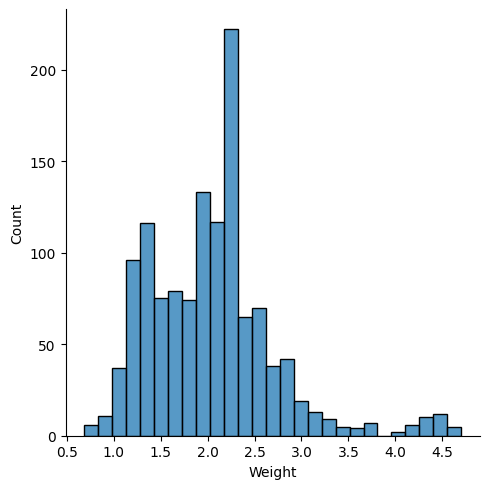

In [74]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

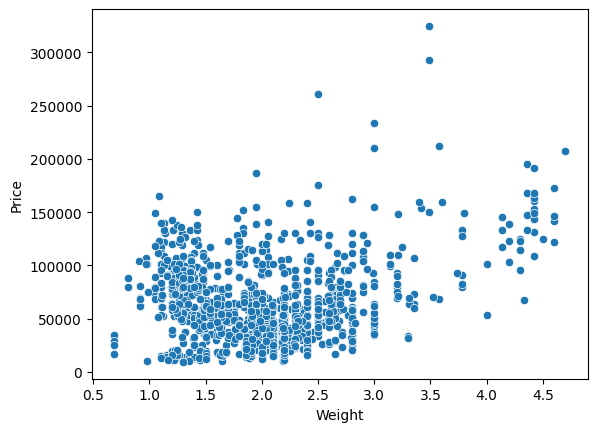

In [75]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [76]:
df.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5,128,Intel,macOS/Windows 7
1,Apple,Ultrabook,8,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5,0,Intel,macOS/Windows 7
2,HP,Notebook,8,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,2.7,1,220.534624,Intel Core i7,512,AMD,macOS/Windows 7
4,Apple,Ultrabook,8,1.37,96095.8080,0,3.1,1,226.983005,Intel Core i5,256,Intel,macOS/Windows 7


In [77]:
df['Price'].describe()

count      1273.000000
mean      60523.131394
std       37341.103385
min        9270.720000
25%       32447.520000
50%       52693.920000
75%       79813.440000
max      324954.720000
Name: Price, dtype: float64

In [78]:
df[df['Price']==324954.720000]

,Company,TypeName,Ram,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,Gpu Brand,OS
196,Razer,Gaming,32,3.49,324954.72,1,2.9,0,254.671349,Intel Core i7,1024,Nvidia,Windows


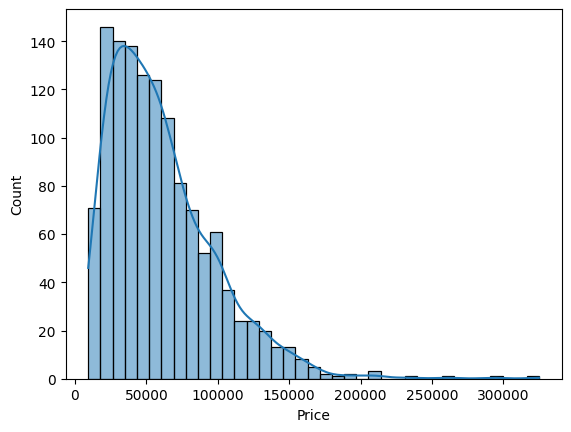

In [79]:
sns.histplot((df['Price']),kde=True)
plt.show()

In [80]:
X = df.drop(columns=['Price'],axis=1)
y = (df['Price'])

In [81]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,Cpu Brand,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,2.3,1,226.983005,Intel Core i5,128,Intel,macOS/Windows 7
1,Apple,Ultrabook,8,1.34,47895.5232,0,1.8,0,127.677940,Intel Core i5,0,Intel,macOS/Windows 7
2,HP,Notebook,8,1.86,30636.0000,0,2.5,0,141.211998,Intel Core i5,256,Intel,Others


In [82]:
encoded_df = pd.get_dummies(df, columns=['Company','TypeName','Cpu Brand','Gpu Brand','OS'],dtype=int)

In [83]:
encoded_df.head()

,Ram,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,SSD,Company_Acer,Company_Apple,...,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,Gpu Brand_AMD,Gpu Brand_Intel,Gpu Brand_Nvidia,OS_Others,OS_Windows,OS_macOS/Windows 7
0,8,1.37,71378.6832,0,2.3,1,226.983005,128,0,1,...,0,1,0,0,0,1,0,0,0,1
1,8,1.34,47895.5232,0,1.8,0,127.677940,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,8,1.86,30636.0000,0,2.5,0,141.211998,256,0,0,...,0,1,0,0,0,1,0,1,0,0
3,16,1.83,135195.3360,0,2.7,1,220.534624,512,0,1,...,0,0,1,0,1,0,0,0,0,1
4,8,1.37,96095.8080,0,3.1,1,226.983005,256,0,1,...,0,1,0,0,0,1,0,0,0,1


In [84]:
encoded_df.columns

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'cpu_freqn', 'IPS', 'PPI',
       'SSD', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Cpu Brand_AMD Processor', 'Cpu Brand_Intel Core i3',
       'Cpu Brand_Intel Core i5', 'Cpu Brand_Intel Core i7',
       'Cpu Brand_Other Intel Processor', 'Gpu Brand_AMD', 'Gpu Brand_Intel',
       'Gpu Brand_Nvidia', 'OS_Others', 'OS_Windows', 'OS_macOS/Windows 7'],
      dtype='object')

In [85]:
X = encoded_df.drop(columns=['Price'])
y = encoded_df['Price']

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score  # Use r2_score for regression; change for classification

# List of models to test
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor()
}
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop(columns=['Price'],axis=1), encoded_df['Price'], test_size=0.2, random_state=42)
    
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        results.append({"Model": name, "R2 Score": score})
    results_df = pd.DataFrame(results)
    return results_df.sort_values(by="R2 Score", ascending=False)
X = df.drop(columns=['Price'])  
y = df['Price']  
results_df = evaluate_models(X, y, models)
print(results_df)

                       Model  R2 Score
5      RandomForestRegressor  0.854359
8        ExtraTreesRegressor  0.838937
6  GradientBoostingRegressor  0.826708
1                      Ridge  0.745063
4      DecisionTreeRegressor  0.721211
2                      Lasso  0.720170
0           LinearRegression  0.719146
3        KNeighborsRegressor  0.694651
7          AdaBoostRegressor  0.658542


In [88]:
import pickle
pickle.dump(results_df,open('results_df.pkl','wb'))

In [89]:
final_model = RandomForestRegressor()

# Train the model on the entire dataset
X = encoded_df.drop(columns=['Price'])
y = encoded_df['Price']
final_model.fit(X, y)

RandomForestRegressor()

In [90]:
encoded_df.head(1)

,Ram,Weight,Price,TouchScreen,cpu_freqn,IPS,PPI,SSD,Company_Acer,Company_Apple,...,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,Gpu Brand_AMD,Gpu Brand_Intel,Gpu Brand_Nvidia,OS_Others,OS_Windows,OS_macOS/Windows 7
0,8,1.37,71378.6832,0,2.3,1,226.983005,128,0,1,...,0,1,0,0,0,1,0,0,0,1


In [91]:
encoded_df.columns

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'cpu_freqn', 'IPS', 'PPI',
       'SSD', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Cpu Brand_AMD Processor', 'Cpu Brand_Intel Core i3',
       'Cpu Brand_Intel Core i5', 'Cpu Brand_Intel Core i7',
       'Cpu Brand_Other Intel Processor', 'Gpu Brand_AMD', 'Gpu Brand_Intel',
       'Gpu Brand_Nvidia', 'OS_Others', 'OS_Windows', 'OS_macOS/Windows 7'],
      dtype='object')

In [ ]:
input_data = {
    'Ram': 8,
    'Weight': 2.3,
    'TouchScreen': 0,  # No touchscreen
    'cpu_freqn': 0,
    'IPS': 1,          # Yes IPS display
    'PPI': 141.76,
    'SSD': 512,
    # One-hot encoding for Company
    'Company_Acer': 0,
    'Company_Apple': 0,
    'Company_Asus': 0,
    'Company_Chuwi': 0,
    'Company_Dell': 0,
    'Company_Fujitsu': 0,
    'Company_Google': 0,
    'Company_HP': 0,  # HP laptop
    'Company_Huawei': 0,
    'Company_LG': 0,
    'Company_Lenovo': 0,
    'Company_MSI': 0,
    'Company_Mediacom': 0,
    'Company_Microsoft': 0,
    'Company_Razer': 1,
    'Company_Samsung': 0,
    'Company_Toshiba': 0,
    'Company_Vero': 0,
    'Company_Xiaomi': 0,
    # One-hot encoding for Type Name
    'TypeName_2 in 1 Convertible': 0,
    'TypeName_Gaming': 1,
    'TypeName_Netbook': 0,
    'TypeName_Notebook': 0,  # Notebook
    'TypeName_Ultrabook': 0,
    'TypeName_Workstation': 0,
    # One-hot encoding for CPU Brand
    'Cpu Brand_AMD Processor': 0,
    'Cpu Brand_Intel Core i3': 0,
    'Cpu Brand_Intel Core i5': 1,  # Intel Core i5
    'Cpu Brand_Intel Core i7': 0,
    'Cpu Brand_Other Intel Processor': 0,
    # One-hot encoding for GPU Brand
    'Gpu Brand_AMD': 0,
    'Gpu Brand_Intel': 0,
    'Gpu Brand_Nvidia': 1,  # Nvidia GPU
    # One-hot encoding for OS
    'OS_Others': 0,
    'OS_Windows': 0,  # Windows OS
    'OS_macOS/Windows 7': 1,
}

input_df = pd.DataFrame([input_data])

In [93]:
predicted_price = final_model.predict(input_df)

In [94]:
print(predicted_price)

[77552.68968]
